In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)#generate dataset which has data distribution is like Circle,,,,
#there are many this kind of functinality are there u can use

<Axes: >

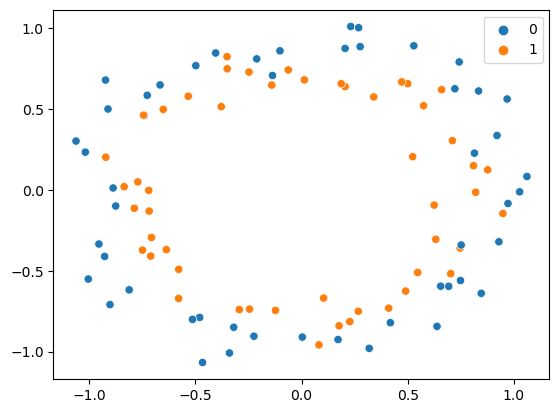

In [3]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
#100 data points are there

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [5]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))#H.L1
model.add(Dense(1, activation='sigmoid'))#o/p layer
#total 2 layers

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])#print 'accuracy' of each epochs while training

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)#verbose=0 ->dont display all information of each epochs,,bcz 3500 epochs is there and take more space in the cell so,,but u can see all informaio by removing verboses

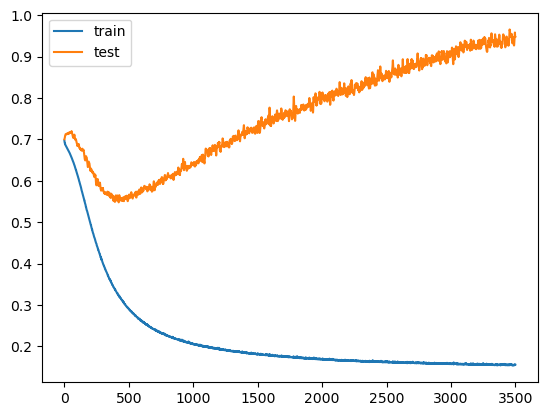

In [8]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')#validation data means unseen data(exactly same as X_test,,used to
#track accuracy,loss(average) at each epochs w.r.t calculated w and b at each epochs
plt.legend()
plt.show()
#X axis shows epochs
#y axis showls loss 

#as u see loss of validation data(kind of X_test,,only diff is it is used for cross vaildation while training,ie;based upon
#calculated w and b for each epochs testing is done INTERNALLY,,and then loss/error and accuracy on validation data is 
#calculated) 
#suppose u have 10 rows in ur dataset,u divided 80% data for training and 20%data for testing
#and when u train the NN by 80% data u can give validation data from this 80% ,,but we want to show u how training loss and 
#validation loss varies ,thats why we given X_test and y_test as validation data
#thus after  epochs_1 is runned,,model have best w and b value compare to other w and b calculated at each row(Stochastic GD)
#of epochs_1 ,at the end of epochs_1 befor going to round2/epochs_2 model will calculate loss(Training loss) and
#validation loss(X_test loss/error while testing model) and bcz we passed metrics=['accuracy'] model(ANN) will calculate
#training accuracy and validation accuracy(testing accuracy) and these are store in history object

#again these above steps are repeated for epochs_2(round2) and so on......thus model will calculate optimum w and b value
#but optimum value means-->model converger(reach to local minima) thus it has best w and b value for which accuracy is high and loss is less for inseen data(X_test)
#but below plot showing that loss/error of unseen data(X_test/validation data ) is high and loss/error of training data is very low
#this clearly indicates our model(AnN) is OVERFITTED
#bcz we have given more epochs value,,,so that model tries to remeber this data ie;prediction line passing through all trainig
#data points.....
#solution-->
#we have to reduce epochs,,but how we know which is best?
#as u see in plott someone around 300 to 350 epochs training and testing loss is varieing same that means our model gets best
#w and b value for which there is no overfitting and, loss is also less and accuracy also good,,,,compare to all w and b values
#calculated at each previous epochs
#assume at 300 epochs we get our best w and b value compare to all other w and b which are calulated at 1 to 299 epochs

# but doing it manually is not feasible sooo,,automate it as below shown

9600/9600 [==============================] - 11s 1ms/step


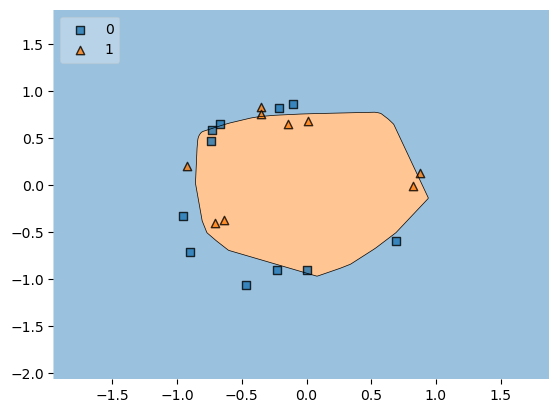

In [9]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()
#as u see model is overfitted

# Early Stopping

In [10]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)#implementaion of early stoping
#monitor="val_loss",-->when test loss/error start increasing and training loss decreasing continously,,then this model monitors
#it and stop the training at that epochs

#if u want to monitor training accuracy and val_accuracy then monitor="val_accuracy",
#thus if at some pt training accuracy starts increasing and testing/validation accuracy strats decreasing then it will stop the traing at that epochs
#bcz above are overfitting conditions,,so early stopping will detect it and stops it eacrly

# monitor: Quantity to be monitored.
# min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
# patience: Number of epochs with no improvement after which training will be stopped.
# verbose: Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action.
# mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
# baseline: Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.
# restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used. An epoch will be restored regardless of the performance relative to the baseline. If no epoch improves on baseline, training will run for patience epochs and restore weights from the best epoch in that set.
# start_from_epoch: Number of epochs to wait before starting to monitor improvement. This allows for a warm-up period in which no improvement is expected and thus training will not be stopped.

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)
#callbacks=callback ->here model will detect correct epochs value,,such that if u go beyond this then overfitting occurs
#ie;automatically model will detect it and train the model at that epochs only and stop there

#as u see our model detected that epochs value is atmost 21,,if u go beyond this then model starts overfitting
#as u see we predicted 300 to 350,,but model predicted 21 ,so we should automate this thing

#there fore

Epoch 1/3500
3/3 [==============================] - 1s 90ms/step - loss: 0.6944 - accuracy: 0.4625 - val_loss: 0.6893 - val_accuracy: 0.6500
Epoch 2/3500
3/3 [==============================] - 0s 21ms/step - loss: 0.6909 - accuracy: 0.5250 - val_loss: 0.6901 - val_accuracy: 0.5500
Epoch 3/3500
3/3 [==============================] - 0s 23ms/step - loss: 0.6899 - accuracy: 0.5375 - val_loss: 0.6924 - val_accuracy: 0.5500
Epoch 4/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6888 - accuracy: 0.5250 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 5/3500
3/3 [==============================] - 0s 36ms/step - loss: 0.6879 - accuracy: 0.5250 - val_loss: 0.6986 - val_accuracy: 0.4500
Epoch 6/3500
3/3 [==============================] - 0s 21ms/step - loss: 0.6869 - accuracy: 0.5250 - val_loss: 0.7010 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 24ms/step - loss: 0.6859 - accuracy: 0.5375 - val_loss: 0.7029 - val_accuracy: 0.4000
Epoch 8/3500


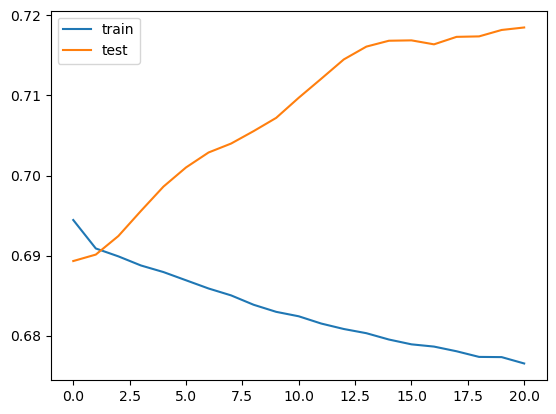

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 11s 1ms/step


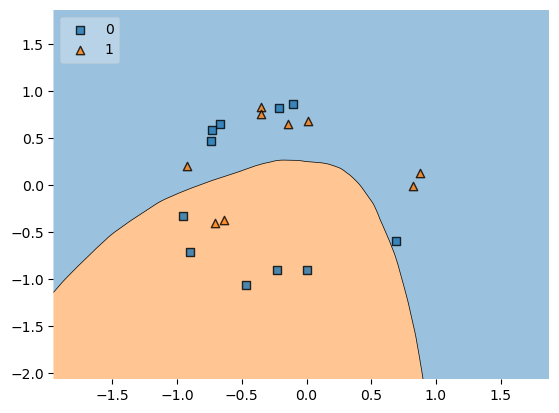

In [15]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()